In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

# Groupby Exercises

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
jobs = pd.read_csv(url, delimiter = '|')

In [3]:
# Mean age per occupation
mean_ages = pd.DataFrame(jobs.age.groupby(jobs.occupation).mean().sort_values())
mean_ages.head(15)

,age
occupation,
student,22.081633
none,26.555556
entertainment,29.222222
artist,31.392857
homemaker,32.571429
programmer,33.121212
technician,33.148148
other,34.523810
scientist,35.548387


In [4]:
# What is the male ratio per occupation, sort it from the most to the least. Do the same for women
jobs.head()

jobs['Male'] = np.where(jobs.gender == 'M', 1, 0)
jobs['Female'] = np.where(jobs.gender == 'F', 1, 0)

print('Male ratio by occupation:')
ratio_M = pd.DataFrame(jobs.Male.groupby(jobs.occupation).mean().sort_values(ascending = False))
ratio_M.head(10)

Male ratio by occupation:


,Male
occupation,
doctor,1.000000
engineer,0.970149
technician,0.962963
retired,0.928571
programmer,0.909091
executive,0.906250
scientist,0.903226
entertainment,0.888889
lawyer,0.833333


In [5]:
print('Female ratio by occupation:')
ratio_F = pd.DataFrame(jobs.Female.groupby(jobs.occupation).mean().sort_values(ascending = False))
ratio_F.head(10)

Female ratio by occupation:


,Female
occupation,
homemaker,0.857143
healthcare,0.687500
librarian,0.568627
artist,0.464286
administrator,0.455696
none,0.444444
writer,0.422222
marketing,0.384615
other,0.342857


In [6]:
# Min and max ages per occupation
jobs_min_max_age = pd.DataFrame()
jobs_min_max_age['Min_age'] = jobs.age.groupby(jobs.occupation).min()
jobs_min_max_age['Max_age'] = jobs.age.groupby(jobs.occupation).max()
jobs_min_max_age.head(15)

,Min_age,Max_age
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [7]:
# For each combination of occupation and gender, calculate the mean age
jobs_mean_ages = pd.DataFrame(jobs.age.groupby([jobs.occupation, jobs.gender]).mean())
jobs_mean_ages.head(10)

age
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000

In [8]:
# For each occupation present the percentage of women and men
jobs.head()

print('Percent of Men and Women by occupation:')
jobs_gender_percentage = pd.DataFrame()
jobs_gender_percentage['Male %'] = round((1/jobs.Male.sum())*100*jobs.Male.groupby(jobs.occupation).sum().sort_values(ascending = False),2)
jobs_gender_percentage['Female %'] = round((1/jobs.Female.sum())*100*jobs.Female.groupby(jobs.occupation).sum().sort_values(ascending = False),2)

jobs_gender_percentage.head(25)

Percent of Men and Women by occupation:


,Male %,Female %
occupation,,
student,20.30,21.98
educator,10.30,9.52
other,10.30,13.19
engineer,9.70,0.73
programmer,8.96,2.20
administrator,6.42,13.19
executive,4.33,1.10
scientist,4.18,1.10
technician,3.88,0.37


# Apply Exercises

In [270]:
url = 'https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv'
crime = pd.read_csv(url, delimiter = ',', parse_dates = ['Year'])

In [271]:
# What is the type of the columns?
crime.dtypes

Year                  datetime64[ns]
Population                     int64
Total                          int64
Violent                        int64
Property                       int64
Murder                         int64
Forcible_Rape                  int64
Robbery                        int64
Aggravated_assault             int64
Burglary                       int64
Larceny_Theft                  int64
Vehicle_Theft                  int64
dtype: object

In [272]:
# Convert the column year to Datetime64

# Already done in csv import

In [273]:
# Set the Year column as the index of the dataframe
crime = crime.set_index(['Year'], drop = True)
crime.head()

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [274]:
# Delete the Total column
crime = crime.drop(columns = ['Total'])
crime.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


In [323]:
# Group the year by decades and sum the values (take care with population values)
crime['Decade'] = (crime.index.year//10)*10
crime_decades = crime.groupby(crime.Decade).sum()

# Population expressed as mean of the decade
crime_decades.Population = crime.groupby(crime.Decade).mean()
crime_decades.head(20)

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Decade,,,,,,,,,,
1960,191505317.5,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970,212119329.8,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980,237137006.9,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990,261282525.8,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000,294796911.7,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010,314029261.4,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [342]:
# What is the most dangerous decade to live in the US
columns_no_pop = crime_decades.drop(columns = ['Population']).columns
crime_decades['Total Decade Crime / Avg. Decade Pop'] = crime_decades[columns_no_pop].sum(axis = 1)/crime_decades.Population
total_crime_decades = pd.DataFrame(crime_decades['Total Decade Crime / Avg. Decade Pop']).sort_values(['Total Decade Crime / Avg. Decade Pop'], ascending = False)
print('Most dangerous decade = 1980')
total_crime_decades.head(10)

Most dangerous decade = 1980


,Total Decade Crime / Avg. Decade Pop
Decade,
1980,2.211774
1990,2.090938
1970,1.904432
2000,1.559235
1960,1.029649
2010,0.638614


# SQLite, Pandas, and the world of tips

In [122]:
# Load CSV into Pandas
url = 'https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/tips.csv'
tips = pd.read_csv(url)

In [124]:
# Save DataFrame as SQLite
conn = sqlite3.connect('tips.db')
c = conn.cursor()
tips.to_sql(name='tips', con=conn)

In [125]:
# Who is most likely to receive a tip during weekday? A Female or a Male?
conn = sqlite3.connect('tips.db')
c = conn.cursor()

df_weekdays = pd.read_sql_query("SELECT tip, sex, day FROM tips WHERE day!='Sun' AND day!='Sat';", con = conn)
df_weekday_gender_avg = pd.DataFrame(df_weekdays.tip.groupby(df_weekdays.sex).mean())
print('Males received higher average tips on weekdays')
df_weekday_gender_avg

Males received higher average tips on weekdays


,tip
sex,
Female,2.620732
Male,2.908500


In [126]:
# And during weekends?
df_weekends = pd.read_sql_query("SELECT tip, sex, day FROM tips WHERE day='Sun' OR day='Sat';", con = conn)
df_weekends.head(20)
df_weekend_gender_avg = pd.DataFrame(df_weekends.tip.groupby(df_weekends.sex).mean())
print('Males received higher average tips on weekends')
df_weekend_gender_avg

Males received higher average tips on weekends


,tip
sex,
Female,3.023043
Male,3.151538


Text(0.5, 1.0, 'Tips by table size\nMax tips from tables of 6')

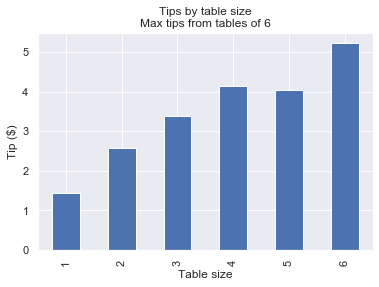

In [128]:
# What is the table size that is most likely to bring a better tip?
sns.set()
sizes = pd.read_sql_query("SELECT size, AVG(tip) FROM tips GROUP BY size;", conn)

sizes['AVG(tip)'].plot.bar()
plt.ylabel('Tip ($)')
plt.xlabel('Table size')
plt.xticks(np.arange(6),(1,2,3,4,5,6))
plt.title('Tips by table size\nMax tips from tables of 6')

In [133]:
# Who are giving more tips, smokers or non smokers?
conn = sqlite3.connect('tips.db')
smokers = pd.read_sql_query("SELECT smoker, AVG(tip) FROM tips GROUP BY smoker;", conn)
conn.close()
print('Smokers are tipping more.')
smokers.head()

Smokers are tipping more.


,smoker,AVG(tip)
0,No,2.991854
1,Yes,3.008710


# Airports

In [139]:
conn = sqlite3.connect('flights.db')
curs = conn.cursor()

In [266]:
# Which is the country that has the least amount of active airlines?
airline_min = pd.read_sql_query(
    "SELECT country, COUNT(*) FROM airlines WHERE active='Y' GROUP BY country ORDER BY COUNT(*) ASC LIMIT 1;", conn)
airline_min.head()

,country,COUNT(*)
0,S.A.,1


In [220]:
# Which is the country that has the most amount of active airlines?
airline_top = pd.read_sql_query(
    "SELECT country, COUNT(*) FROM airlines WHERE active='Y' GROUP BY country ORDER BY COUNT(*) DESC LIMIT 1;", conn)
airline_top.head()

,country,COUNT(*)
0,United States,141


In [221]:
# Which is the country that has the least airports?
airport_min = pd.read_sql_query(
    "SELECT country, COUNT(*) FROM airports GROUP BY country ORDER BY COUNT(*) ASC LIMIT 1;", conn)
airport_min.head()

,country,COUNT(*)
0,Albania,1


In [222]:
# Which is the country that has the most airports?
airport_min = pd.read_sql_query(
    "SELECT country, COUNT(*) FROM airports GROUP BY country ORDER BY COUNT(*) DESC LIMIT 1;", conn)
airport_min.head()

,country,COUNT(*)
0,United States,1697


In [232]:
# Which country has the most outgoing destinations?
outgoing_max = pd.read_sql_query(
    "SELECT country, COUNT(*) FROM airports INNER JOIN routes ON airports.code = routes.source GROUP BY country ORDER BY COUNT(*) DESC LIMIT 1;", conn)
outgoing_max.head()

,country,COUNT(*)
0,United States,13195


In [233]:
# Which country has the least outgoing destinations?
outgoing_max = pd.read_sql_query(
    "SELECT country, COUNT(*) FROM airports INNER JOIN routes ON airports.code = routes.source GROUP BY country ORDER BY COUNT(*) ASC LIMIT 1;", conn)
outgoing_max.head()

,country,COUNT(*)
0,American Samoa,1


In [234]:
# Which country has the most incoming destinations?
outgoing_max = pd.read_sql_query(
    "SELECT country, COUNT(*) FROM airports INNER JOIN routes ON airports.code = routes.dest GROUP BY country ORDER BY COUNT(*) DESC LIMIT 1;", conn)
outgoing_max.head()

,country,COUNT(*)
0,United States,13189


In [235]:
# Which country has the least incoming destinations?
outgoing_max = pd.read_sql_query(
    "SELECT country, COUNT(*) FROM airports INNER JOIN routes ON airports.code = routes.dest GROUP BY country ORDER BY COUNT(*) ASC LIMIT 1;", conn)
outgoing_max.head()

,country,COUNT(*)
0,American Samoa,1


# Kaggle Titanic

In [257]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [258]:
pd.DataFrame(train.Survived.groupby(train.Sex).sum())

,Survived
Sex,
female,233
male,109


In [259]:
# What was the age group that had a higher survival chance? 
# You can divide age groups in groups of 10 years
train['age_group'] = (train.Age//10)*10
print('% Survived by age group (Descending)')
pd.DataFrame(round(train.Survived.groupby(train.age_group).mean()*100).sort_values(ascending = False))

% Survived by age group (Descending)


,Survived
age_group,
80.0,100.0
0.0,61.0
30.0,44.0
50.0,42.0
10.0,40.0
40.0,38.0
20.0,35.0
60.0,32.0
70.0,0.0


In [260]:
# Which port of embarkation had most of the survivors? And which less?
print('Survival by Port of Embarkation (Desending)')
pd.DataFrame(train.Survived.groupby(train.Embarked).sum().sort_values(ascending = False))

Survival by Port of Embarkation (Desending)


,Survived
Embarked,
S,217
C,93
Q,30


In [261]:
# Which ticket class had most of the survivors? And which less?
print('Survival by Passenger Class (Desending)')
pd.DataFrame(train.Survived.groupby(train.Pclass).sum().sort_values(ascending = False))

Survival by Passenger Class (Desending)


,Survived
Pclass,
1,136
3,119
2,87


Text(0.5, 1.0, 'Higher rate of survival associated with higher fare.')

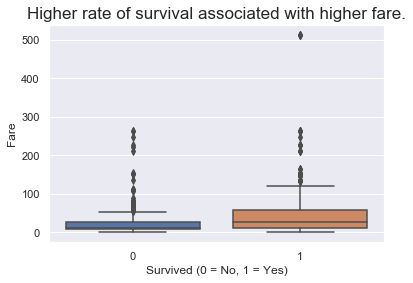

In [276]:
# Could you compare the ticket fare with the survival? 
# Did more expensive tickets had higher chance of surviving?
sns.boxplot(x = train.Survived, y =train.Fare)
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.title('Higher rate of survival associated with higher fare.', size = 17)